# $\text{Damped Oscillation using RK4}$

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### $\text{Constants}$

In [101]:
y0 = 1    # initial position (m)
v0 = 0    # initial velocity (m/s)
m = 1     # mass (kg)
b = 3.5   # damping constant
k = 100   # spring constant

t0 = 0.0  # initial time
tf = 3.0  # final time
h  = 0.01 # step size

initial_condition = [y0, v0, t0, tf, h]

### $\text{Motion Equation}$

In [102]:
def motion_equation(t, Y):
    y, v = Y
    dydt = v
    dvdt = - (b / m) * v - (k / m) * y
    return [dydt, dvdt]

### $\text{Analytic Solution}$

In [103]:
def analytic_solution(t):
    wd = ((k/m) - (b/2*m)**2)**(0.5) # damped angular velocity
    gamma = b/(2*m)
    return y0 * np.exp(-gamma*t) * np.cos(wd*t)

### $\text{4th Order Runge-Kutta Method}$

In [104]:
class rk4_method():
    def __init__ (self, equation, initial_condition):
        self.equation = equation # Must be function of x1 and x2
        self.initial_condition = initial_condition # [x0, v0, t0, tf, h]

    def solve(self):
        # Initial condition
        init = self.initial_condition
        t = init[2]
        x = init[0]
        v = init[1]
        h = init[4]

        # Appending data
        datat = []
        datax = []
        datav = []

        # Starting loop RK4 meethod
        while t <= init[3]:
            x1_x2 = [x, v]
            k1 = self.equation(t, x1_x2)

            x1_x2 = [x + (h/2)*k1[0], v + (h/2)*k1[1]]
            k2 = self.equation(t + (h/2), x1_x2)

            x1_x2 = [x + (h/2)*k2[0], v + (h/2)*k2[1]]
            k3 = self.equation(t + (h/2), x1_x2)

            x1_x2 = [x + h*k3[0], v + h*k3[1]]
            k4 = self.equation(t + h, x1_x2)

            datat.append(t)
            datax.append(x)
            datav.append(v)

            x = x + (1/6)*h*(k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
            v = v + (1/6)*h*(k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
            t += h

        # Returning data t, x, and v using list
        return [datat, datax, datav]

### $\text{Slove the Motion Equation using RK4}$

In [105]:
solver = rk4_method(
    equation=motion_equation,
    initial_condition=initial_condition
)

t, y, v = solver.solve()

### $\text{Evaluation using MSE}$

In [106]:
# Initialize the prediction and true array
y_pred = y
y_true = analytic_solution(np.array(t))

# Calculate the MSE Loss
MSELoss = mean_squared_error(y_pred, y_true)

print(f"MSE Loss: {MSELoss*100:.4f} %")

MSE Loss: 0.1453 %


### $\text{Visualization}$

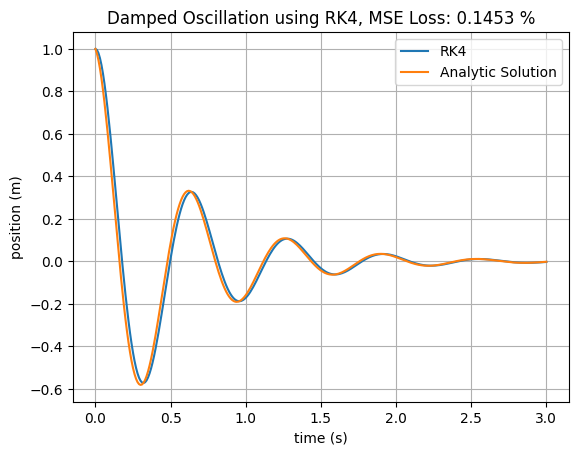

In [107]:
# Plotting
plt.plot(t, y_pred, label="RK4")
plt.plot(t, y_true, label="Analytic Solution")
plt.title(f"Damped Oscillation using RK4, MSE Loss: {MSELoss*100:.4f} %")
plt.xlabel("time (s)")
plt.ylabel("position (m)")
plt.legend()
plt.grid(True)
plt.show()